In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\user\Desktop\PYTHON\COMPLETED\climatechange\GlobalLandTemperaturesByState.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
df.shape

(645675, 5)

In [6]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [7]:
#check the null values in the dataset
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [8]:
#drop all the rows with null values since we have a large dataset
df.dropna(how = "any", axis= 0, inplace=True)
df.shape

(620027, 5)

In [9]:
#convert the dt column to datetime
df["dt"] = pd.to_datetime(df["dt"])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [10]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [11]:
#create seperate year column in the dataset
df['year'] = pd.DatetimeIndex(df['dt']).year
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
0,1855-05-01,25.544,1.171,Acre,Brazil,1855
1,1855-06-01,24.228,1.103,Acre,Brazil,1855
2,1855-07-01,24.371,1.044,Acre,Brazil,1855
3,1855-08-01,25.427,1.073,Acre,Brazil,1855
4,1855-09-01,25.675,1.014,Acre,Brazil,1855


In [12]:
#create dt column as the index
df.set_index("dt", inplace= True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
dt,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [13]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [14]:
#Take the range between 1980 and 2013
new_df = df.loc["1980":"2013"]
new_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
dt,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [15]:
#Group the average temperatures based on their countries and sort their avg temp.
new_df[["AverageTemperature","Country"]].groupby(["Country"]).mean().sort_values("AverageTemperature")

,AverageTemperature
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


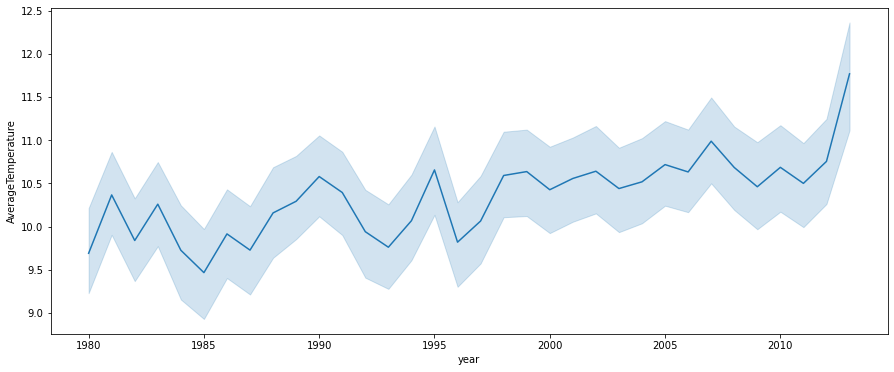

In [16]:
#Plot a line graphs showing avg temperatures throgh years
plt.figure(figsize= (15,6))
sns.lineplot(x= new_df["year"], y= new_df["AverageTemperature"] )
plt.show()

In [17]:
#Resample the AverageTemperature by years to create more distinct garph 
#A is abbreviation for- year end frequency
data = new_df[["AverageTemperature"]].resample("A").mean()
data.head()

,AverageTemperature
dt,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


Text(0.5, 1.0, 'Temperature change from 1980-2013')

<Figure size 1080x432 with 0 Axes>

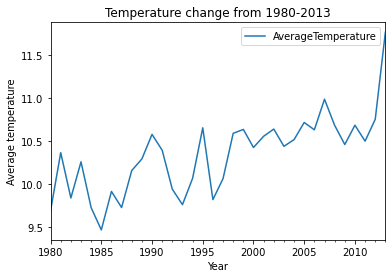

In [18]:
plt.figure(figsize= (15,6))
data.plot()
plt.xlabel("Year")
plt.ylabel("Average temperature")
plt.title("Temperature change from 1980-2013")

#### Apply the Dikey Fuller test and check the hypothesis for resample data

In [21]:
#import adfuller
from statsmodels.tsa.stattools import adfuller
test_df = adfuller(data.iloc[:,0].values, autolag = "AIC")
test_output = pd.Series(test_df[0:4], index= ["ADF Value", "p-values", "lags used","no.of observations"])

for key, value in test_df[4].items():
    test_output["critical value(%s)" %key] = value
print("Dickey Fuller test result:")
print(test_output)

#check hypothesis
if test_output[0] < test_output[4]:
    print("reject Ho-time seies is Stationary")
else:
    print("-Time seies is Not Stationary")

Dickey Fuller test result:
ADF Value              -0.728209
p-values                0.839307
lags used               2.000000
no.of observations     31.000000
critical value(1%)     -3.661429
critical value(5%)     -2.960525
critical value(10%)    -2.619319
dtype: float64
-Time seies is Not Stationary


#### Decompose the data , extract components and plot the original time series, 
#### the trend,seasonal and residual component

In [22]:
#import the library
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data, freq=3)
trend= decomp.trend
seasonal= decomp.seasonal
residual =decomp.resid

<ipython-input-22-d53a81a4762a>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = seasonal_decompose(data, freq=3)


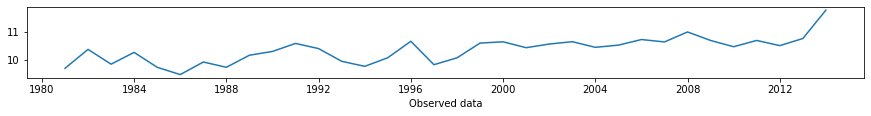

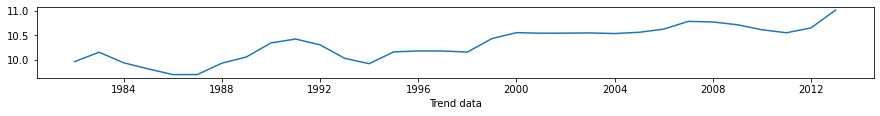

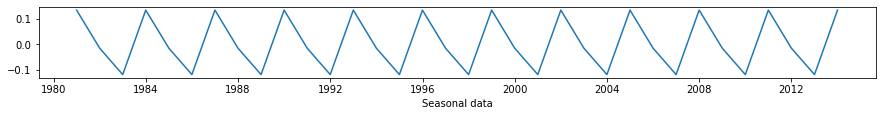

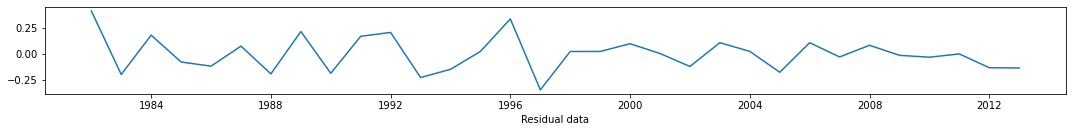

In [23]:
# plot the original or observed component
plt.figure(figsize= (15,6))
plt.subplot(411)
plt.plot(data)
plt.xlabel("Observed data")

# plot the trend component
plt.figure(figsize= (15,6))
plt.subplot(412)
plt.plot(trend)
plt.xlabel("Trend data")

# plot the seasonal component
plt.figure(figsize= (15,6))
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel("Seasonal data")

# plot the residual component
plt.figure(figsize= (15,6))
plt.subplot(414)
plt.plot(residual)
plt.xlabel("Residual data")

plt.tight_layout()

#### For the trend line to be constant over time,
#### we need to tranform the data by using moving average and exponential smoothening

In [46]:
#Transform the data by using moving average and exponential weighted mean
#rolling mean
mov_avg = resample_df.rolling(window=3, center=True).mean()

#exponentially weighted mean
ewm = resample_df.ewm(span=3).mean()

#rolling standard deviation 
rolling_stdev = resample_df.rolling(window = 3, center= True).std()

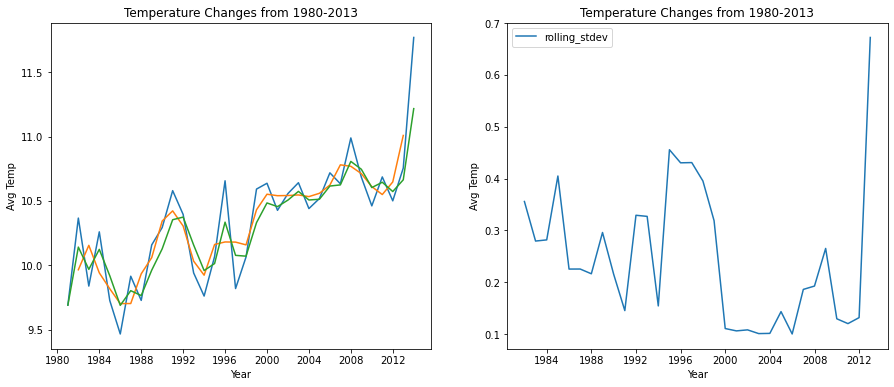

In [89]:
#create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.plot(resample_df, label ="Original")
ax1.plot(rolling_mean, label ="rolling_mean")
ax1.plot(ewm, label ="exponentially weighted mean")
ax1.set_title("Temperature Changes from 1980-2013")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Temp")



ax2.plot(rolling_stdev, label ="rolling_stdev")
ax2.set_title("Temperature Changes from 1980-2013")
ax2.set_xlabel("Year")
ax2.set_ylabel("Avg Temp")

plt.legend()
plt.show()

#### Apply the Dikey Fuller test and check the hypothesis for rolling mean

In [68]:
#drop all the Null values of rolling_mean and ewm
rolling_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

In [85]:
test_df = adfuller(rolling_mean.iloc[:,0].values, autolag="AIC")
test_output = pd.Series(test_df[0:4], index= ["ADF value", "p-value", "lags used","no.of observations"])

for key, value in test_df[4].items():
    test_output["critical value (%s)" %key] = value
print("Dickey Fuller test for rolling mean:")
print(test_output)

if test_output[0] < test_output[4]:
    print("reject Ho-time seies is Stationary")
else:
    print("-Time seies is Not Stationary")

Dickey Fuller test for rolling mean:
ADF value                0.275101
p-value                  0.976173
lags used                8.000000
no.of observations      23.000000
critical value (1%)     -3.752928
critical value (5%)     -2.998500
critical value (10%)    -2.638967
dtype: float64
-Time seies is Not Stationary


#### Apply the Dikey Fuller test and check the hypothesis for exponentially weighted mean

In [86]:
test_df = adfuller(ewm.iloc[:,0])
test_output = pd.Series(test_df[0:4], index=["ADF value", "p-value", "lags used", "no. of observations"])

for key, value in test_df[4].items():
    test_output["critical values (%s)" %key] = value
print("Dickey Fuller test for exponentially weighted mean:")
print(test_output)

if test_output[0] < test_output[4]:
    print("reject Ho-time seies is Stationary")
else:
    print("-Time seies is Not Stationary")

Dickey Fuller test for exponentially weighted mean:
ADF value                -0.338693
p-value                   0.919843
lags used                 2.000000
no. of observations      31.000000
critical values (1%)     -3.661429
critical values (5%)     -2.960525
critical values (10%)    -2.619319
dtype: float64
-Time seies is Not Stationary


#### Use differencing to remove the rolling average and ewm from original time series

In [93]:
diff_rolling_mean = resample_df - rolling_mean
diff_rolling_mean.dropna(inplace=True)
diff_rolling_mean.head()

,AverageTemperature
dt,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [96]:
diff_ewm = resample_df -ewm
diff_ewm.dropna(inplace = True)
diff_ewm.head()

,AverageTemperature
dt,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


In [98]:
#Plot graph of diff_rolling_mean and diff_ewm

#Transform the data by using rolling mean and exponential weighted mean
#rolling mean
roll_diff_rolling_mean = diff_rolling_mean.rolling(window=3, center=True).mean()

#exponentially weighted mean
ewm_diff_ewm = diff_ewm.ewm(span=3).mean()


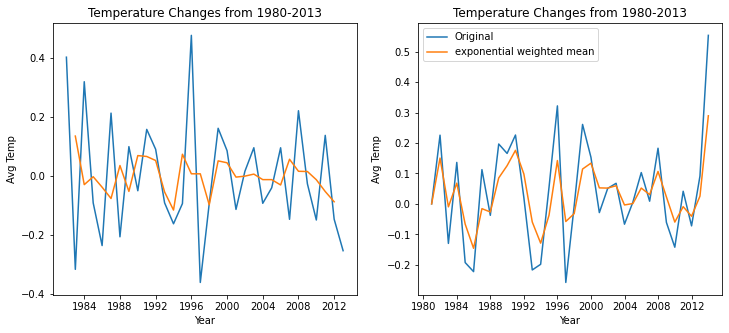

In [100]:
#create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(diff_rolling_mean, label ="Original ")
ax1.plot(roll_diff_rolling_mean, label ="rolling_mean")
ax1.set_title("Temperature Changes from 1980-2013")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg Temp")



ax2.plot(diff_ewm, label ="Original")
ax2.plot(ewm_diff_ewm, label="exponential weighted mean" )
ax2.set_title("Temperature Changes from 1980-2013")
ax2.set_xlabel("Year")
ax2.set_ylabel("Avg Temp")

plt.legend()